In [10]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy
import time
from scipy.stats import linregress

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f206cc2a2ca26c97b382be8572a425c3


In [12]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [15]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into the city data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | alta floresta
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | pimentel
Processing Record 8 of Set 1 | jiaocheng
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | halifax
Processing Record 12 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 13 of Set 1 | fort nelson
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | san quintin
Processing Recor

Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | rab
City not found. Skipping...
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | tabou
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | scarborough
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | quimper
Processing Record 49 of Set 4 | mandalgovi
Processing Record 50 of Set 4 | marawi
Processing Record 1 of Set 5 | marrakesh
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | fujin
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | thinadhoo
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | saint-francois
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | nedjo
Processing Record 10 of Set 5 | erzin
Processing Record 11 of Set 5 | vagur
Proces

Processing Record 28 of Set 8 | mersing
Processing Record 29 of Set 8 | flinders
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | kudahuvadhoo
Processing Record 32 of Set 8 | lang son
Processing Record 33 of Set 8 | magadan
Processing Record 34 of Set 8 | tarauaca
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | camacupa
Processing Record 38 of Set 8 | chokurdakh
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | saurimo
Processing Record 41 of Set 8 | porbandar
Processing Record 42 of Set 8 | abu samrah
Processing Record 43 of Set 8 | saldanha
Processing Record 44 of Set 8 | diamantino
Processing Record 45 of Set 8 | surt
Processing Record 46 of Set 8 | levice
Processing Record 47 of Set 8 | muros
Processing Record 48 of Set 8 | mandurah
Processing Record 49 of Set 8 | naryan-mar
Processing Record 50 of Set 8 | acajutla
Processing Record 1 

City not found. Skipping...
Processing Record 17 of Set 12 | kargil
Processing Record 18 of Set 12 | quime
Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | mount holly
Processing Record 21 of Set 12 | salinas
Processing Record 22 of Set 12 | santa isabel do rio negro
Processing Record 23 of Set 12 | healdsburg
Processing Record 24 of Set 12 | petrovskaya
Processing Record 25 of Set 12 | yamada
Processing Record 26 of Set 12 | wodonga
Processing Record 27 of Set 12 | paamiut
Processing Record 28 of Set 12 | barahona
Processing Record 29 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 30 of Set 12 | zabol
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | buchanan
Processing Record 33 of Set 12 | nanzhou
Processing Record 34 of Set 12 | hambantota
Processing Record 35 of Set 12 | aksarka
Processing Record 36 of Set 12 | marzuq
Processing Record 37 of Set 12 | burns lake
Processing Record 38 of Set 12 | it

In [16]:
len(city_data)

546

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.90,-24.50,72.79,76,93,15.57,CV,2020-04-15 20:35:26
1,Narsaq,60.92,-46.05,37.40,74,100,1.12,GL,2020-04-15 20:35:26
2,Alta Floresta,-9.88,-56.09,82.40,74,75,6.93,BR,2020-04-15 20:35:09
3,Kapaa,22.08,-159.32,80.60,74,75,12.75,US,2020-04-15 20:35:27
4,Port Alfred,-33.59,26.89,61.00,94,3,1.99,ZA,2020-04-15 20:35:27
5,Yellowknife,62.46,-114.35,28.00,73,75,5.82,CA,2020-04-15 20:35:01
6,Pimentel,-6.84,-79.93,66.20,29,3,20.80,PE,2020-04-15 20:35:28
7,Jiaocheng,24.68,116.14,60.55,73,100,1.36,CN,2020-04-15 20:35:28
8,Punta Arenas,-53.15,-70.92,57.20,54,91,4.34,CL,2020-04-15 20:35:13
9,Halifax,44.65,-63.57,42.01,100,90,4.70,CA,2020-04-15 20:35:30


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-04-15 20:35:26,14.90,-24.50,72.79,76,93,15.57
1,Narsaq,GL,2020-04-15 20:35:26,60.92,-46.05,37.40,74,100,1.12
2,Alta Floresta,BR,2020-04-15 20:35:09,-9.88,-56.09,82.40,74,75,6.93
3,Kapaa,US,2020-04-15 20:35:27,22.08,-159.32,80.60,74,75,12.75
4,Port Alfred,ZA,2020-04-15 20:35:27,-33.59,26.89,61.00,94,3,1.99
5,Yellowknife,CA,2020-04-15 20:35:01,62.46,-114.35,28.00,73,75,5.82
6,Pimentel,PE,2020-04-15 20:35:28,-6.84,-79.93,66.20,29,3,20.80
7,Jiaocheng,CN,2020-04-15 20:35:28,24.68,116.14,60.55,73,100,1.36
8,Punta Arenas,CL,2020-04-15 20:35:13,-53.15,-70.92,57.20,54,91,4.34
9,Halifax,CA,2020-04-15 20:35:30,44.65,-63.57,42.01,100,90,4.70


In [19]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

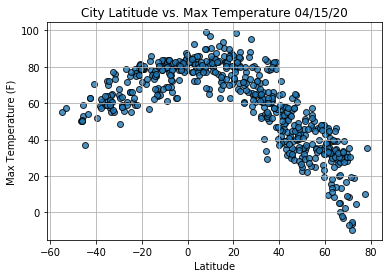

In [21]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

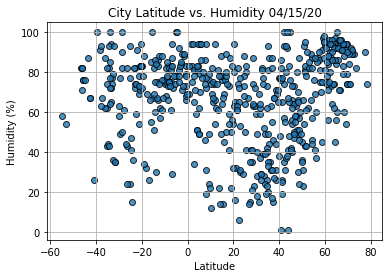

In [22]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

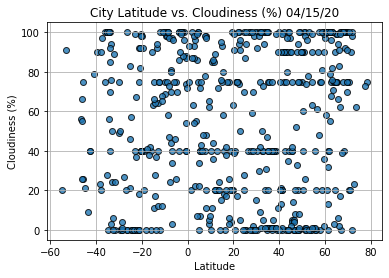

In [23]:
# Build the scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

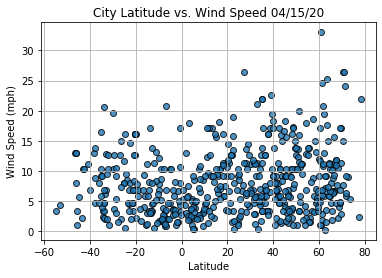

In [24]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [25]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2020-04-15 20:35:31
Lat                         -46.6
Lng                        168.33
Max Temp                       50
Humidity                       82
Cloudiness                     56
Wind Speed                     13
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
541    False
542     True
543     True
544     True
545    False
Name: Lat, Length: 546, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2020-04-15 20:35:26,14.90,-24.50,72.79,76,93,15.57
1,Narsaq,GL,2020-04-15 20:35:26,60.92,-46.05,37.40,74,100,1.12
3,Kapaa,US,2020-04-15 20:35:27,22.08,-159.32,80.60,74,75,12.75
5,Yellowknife,CA,2020-04-15 20:35:01,62.46,-114.35,28.00,73,75,5.82
7,Jiaocheng,CN,2020-04-15 20:35:28,24.68,116.14,60.55,73,100,1.36
...,...,...,...,...,...,...,...,...,...
539,Fort Frances,CA,2020-04-15 20:38:19,48.60,-93.40,34.00,24,1,17.22
540,Liure,HN,2020-04-15 20:38:19,13.54,-87.09,91.40,22,20,9.17
542,Seymchan,RU,2020-04-15 20:38:20,62.88,152.43,11.14,90,76,0.27
543,Sheltozero,RU,2020-04-15 20:38:20,61.37,35.37,33.40,88,13,6.80


In [29]:
# Create Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

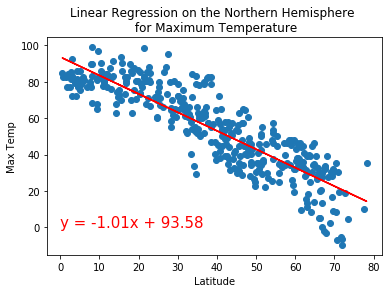

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (0,0))


In [41]:
# Check the r-value for the above plot
linregress(x_values, y_values)

LinregressResult(slope=-1.013200791536875, intercept=93.5750659441166, rvalue=-0.878702170373481, pvalue=9.002949089346647e-124, stderr=0.028274159260480373)

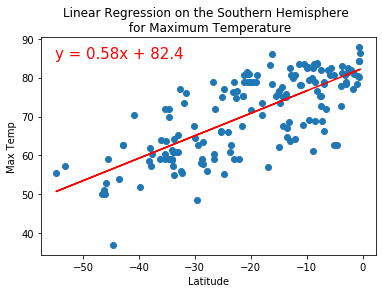

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-55,85))

In [39]:
# Check the r-value for the above plot
linregress(x_values, y_values)

LinregressResult(slope=0.5780128791094613, intercept=82.3950944753199, rvalue=0.7372975104296043, pvalue=1.4502173430272093e-29, stderr=0.04148299828963854)

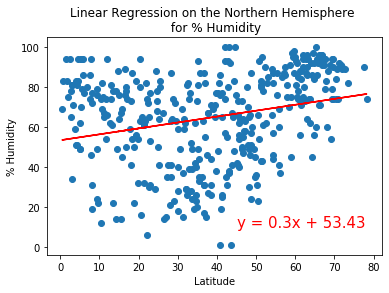

In [46]:
# Humditity linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (45, 10))

In [47]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=0.29620364359631274, intercept=53.430129236833736, rvalue=0.2593245087760865, pvalue=2.847689313098629e-07, stderr=0.05666436711305635)

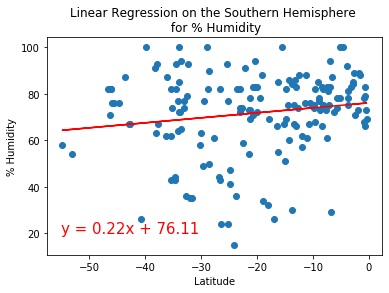

In [55]:
# Humidity linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", 
                      "% Humidity", (-55, 20))

In [56]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=0.21515512434875222, intercept=76.11015051284959, rvalue=0.16085596362502452, pvalue=0.039019197291554855, stderr=0.10340181212368665)

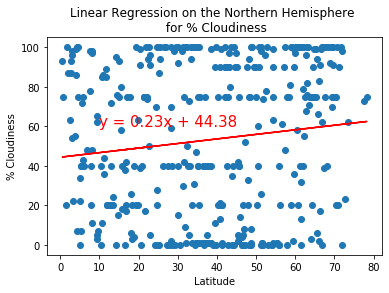

In [58]:
# Cloudiness linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                      "% Cloudiness", (10,60))

In [59]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=0.2309675880986594, intercept=44.377827452194396, rvalue=0.1239137155006444, pvalue=0.015516848341150675, stderr=0.09500620729115569)

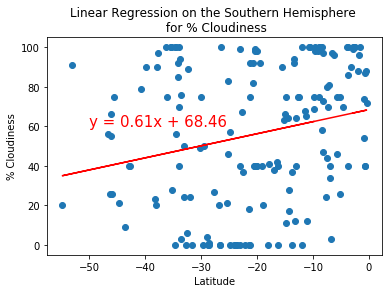

In [62]:
# Cloudiness linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                      "% Cloudiness", (-50,60))

In [63]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=0.6106694917631711, intercept=68.4601359283419, rvalue=0.22840915339553142, pvalue=0.003169805204167226, stderr=0.20387499946377102)

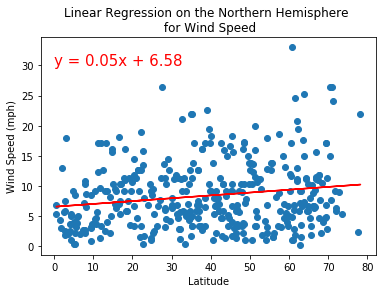

In [67]:
# Wind speed linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                      "Wind Speed (mph)", (0, 30))

In [68]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=0.04707181747858392, intercept=6.577169345289098, rvalue=0.17334848820399018, pvalue=0.0006781298265946073, stderr=0.013737131159745628)

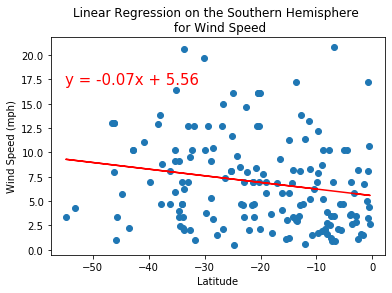

In [73]:
# Wind speed linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                      "Wind Speed (mph)", (-55, 17))

In [74]:
# Check the r-value
linregress(x_values, y_values)

LinregressResult(slope=-0.06826153990494112, intercept=5.5559496683362255, rvalue=-0.1920999293683849, pvalue=0.013440621377426801, stderr=0.027314309621484362)